In [1]:
from raw_python.Bagging import create_models, create_bags, evaluate, evaluate_stats, evaluate_f1
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import random
from raw_python.BaggingSA import BaggingSA
from typing import Tuple
import sklearn
from raw_python.DatasetsHandle import get_dataset

seed = 41
np.random.seed(seed)
random.seed(seed)

In [2]:
X,y = get_dataset('students_dropout')
#count each class amount
print(pd.Series(y).value_counts())

['Dropout' 'Enrolled' 'Graduate']
[0 1 2]
2    2209
0    1421
1     794
Name: count, dtype: int64


In [ ]:
def evaluate_bagging_sa():
    bagging_sa = BaggingSA(X=X_train, y=y_train,
                                T0=2.0, alpha=0.995, cooling_method= 'geometric', max_iterations=2000, n_trees=10,
                                feature_mutation_chance=0.25, validation_split_amount=5, beta=0.75, gamma=0.25, delta=0.05)
    models, fitness = bagging_sa.run(X_for_test=X_test, y_for_test=y_test, monitor_fun=fun_monitor, get_fitness=True)
    accuracy = evaluate(X_test, y_test, models=models)
    return accuracy, models, fitness

def fun_monitor(iteration, T, best_fitness, fitness, new_fitness, accuracy):
    if accuracy is None:
        accuracy = 0.0
    
    print(f"I: {iteration}, T: {T:.3f}, Best fitness: {best_fitness:.3f}, Fitness: {fitness:.3f}, New fitness: {new_fitness:.3f}, Accuracy: {accuracy:.3f}")
    fits.append(new_fitness)
    accs.append(accuracy)
    run_through_res.append([iteration, T, best_fitness, fitness, new_fitness, accuracy])
    global diff_sum

fits = []
accs = []
run_through_res = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

acc_sa, models, fitness_sa = evaluate_bagging_sa()
df = pd.DataFrame(run_through_res, columns=['Iteration', 'T', 'BestFitness', 'Fitness', 'NewFitness', 'Accuracy'])

df.to_csv('./../res/bagging_sa_detail_geometric.csv', index=False)


I: 1, T: 2.000, Best fitness: 0.689, Fitness: 0.689, New fitness: 0.678, Accuracy: 0.677
I: 2, T: 1.990, Best fitness: 0.689, Fitness: 0.678, New fitness: 0.673, Accuracy: 0.672
I: 3, T: 1.980, Best fitness: 0.689, Fitness: 0.673, New fitness: 0.691, Accuracy: 0.667
I: 4, T: 1.970, Best fitness: 0.691, Fitness: 0.691, New fitness: 0.683, Accuracy: 0.675
I: 5, T: 1.960, Best fitness: 0.691, Fitness: 0.683, New fitness: 0.682, Accuracy: 0.686
I: 6, T: 1.950, Best fitness: 0.691, Fitness: 0.682, New fitness: 0.677, Accuracy: 0.684
I: 7, T: 1.941, Best fitness: 0.691, Fitness: 0.677, New fitness: 0.678, Accuracy: 0.679
I: 8, T: 1.931, Best fitness: 0.691, Fitness: 0.678, New fitness: 0.661, Accuracy: 0.683
I: 9, T: 1.921, Best fitness: 0.691, Fitness: 0.661, New fitness: 0.675, Accuracy: 0.665
I: 10, T: 1.912, Best fitness: 0.691, Fitness: 0.675, New fitness: 0.684, Accuracy: 0.681
I: 11, T: 1.902, Best fitness: 0.691, Fitness: 0.684, New fitness: 0.687, Accuracy: 0.678
I: 12, T: 1.893, Be

++==============================
|| Fitness:  0.729
|| Accuracy: 0.758
++==============================
{'accuracy': 0.7581920903954802, 'precision': 0.6926778086867903, 'recall': 0.657337430670348, 'f1': 0.6651386473321957, 'cm': array([[214,  32,  46],
       [ 40,  47,  67],
       [ 12,  17, 410]])}
F1: [0.76702509 0.376      0.85239085]


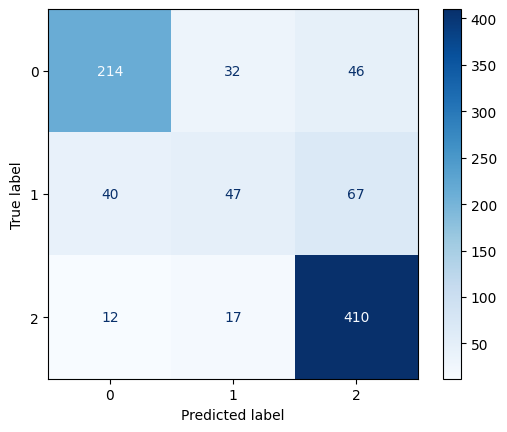

In [4]:
print("++==============================")
print(f"|| Fitness:  {fitness_sa:.3f}")
print(f"|| Accuracy: {acc_sa:.3f}")
print("++==============================")

stats = evaluate_stats(X_test, y_test, models)
print(stats)


f1 = evaluate_f1(X_test, y_test, models, average=None)
print(f"F1: {f1}")

from sklearn.metrics import ConfusionMatrixDisplay

cm = stats['cm']
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [5]:
from raw_python.Bagging import predict

for i, model in enumerate(models):
    y_pred = predict(X_test, [model])
    acc = accuracy_score(y_test, y_pred)
    print(f"Model [{i}] accuracy: {acc:.3f}")


Model [0] accuracy: 0.612
Model [1] accuracy: 0.615
Model [2] accuracy: 0.679
Model [3] accuracy: 0.670
Model [4] accuracy: 0.609
Model [5] accuracy: 0.659
Model [6] accuracy: 0.638
Model [7] accuracy: 0.631
Model [8] accuracy: 0.606
Model [9] accuracy: 0.690
Model [10] accuracy: 0.677
Model [11] accuracy: 0.654
Model [12] accuracy: 0.650
Model [13] accuracy: 0.660
Model [14] accuracy: 0.546
Model [15] accuracy: 0.634
Model [16] accuracy: 0.647
Model [17] accuracy: 0.655
Model [18] accuracy: 0.667
Model [19] accuracy: 0.667


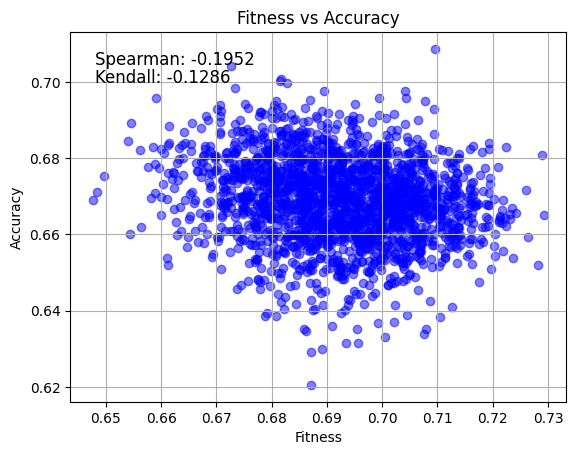

Spearman correlation: -0.1952 (p=1.2582e-18)
Kendall's Tau: -0.1286 (p=6.6020e-18)
Pearson correlation: -0.1823 (p=2.1157e-16)


In [6]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau, pearsonr


X1 = fits
X2 = accs

spearman_corr, spearman_p = spearmanr(X1, X2)
kendall_corr, kendall_p = kendalltau(X1, X2)
pearson_corr, pearson_p = pearsonr(X1, X2)

plt.scatter(X1, X2, c='blue', alpha=0.5)

plt.text(0.05, 0.95, f'Spearman: {spearman_corr:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Kendall: {kendall_corr:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Fitness')
plt.ylabel('Accuracy')
plt.title('Fitness vs Accuracy')
plt.grid(True)
plt.show()




print(f"Spearman correlation: {spearman_corr:.4f} (p={spearman_p:.4e})")
print(f"Kendall's Tau: {kendall_corr:.4f} (p={kendall_p:.4e})")
print(f"Pearson correlation: {pearson_corr:.4f} (p={pearson_p:.4e})")


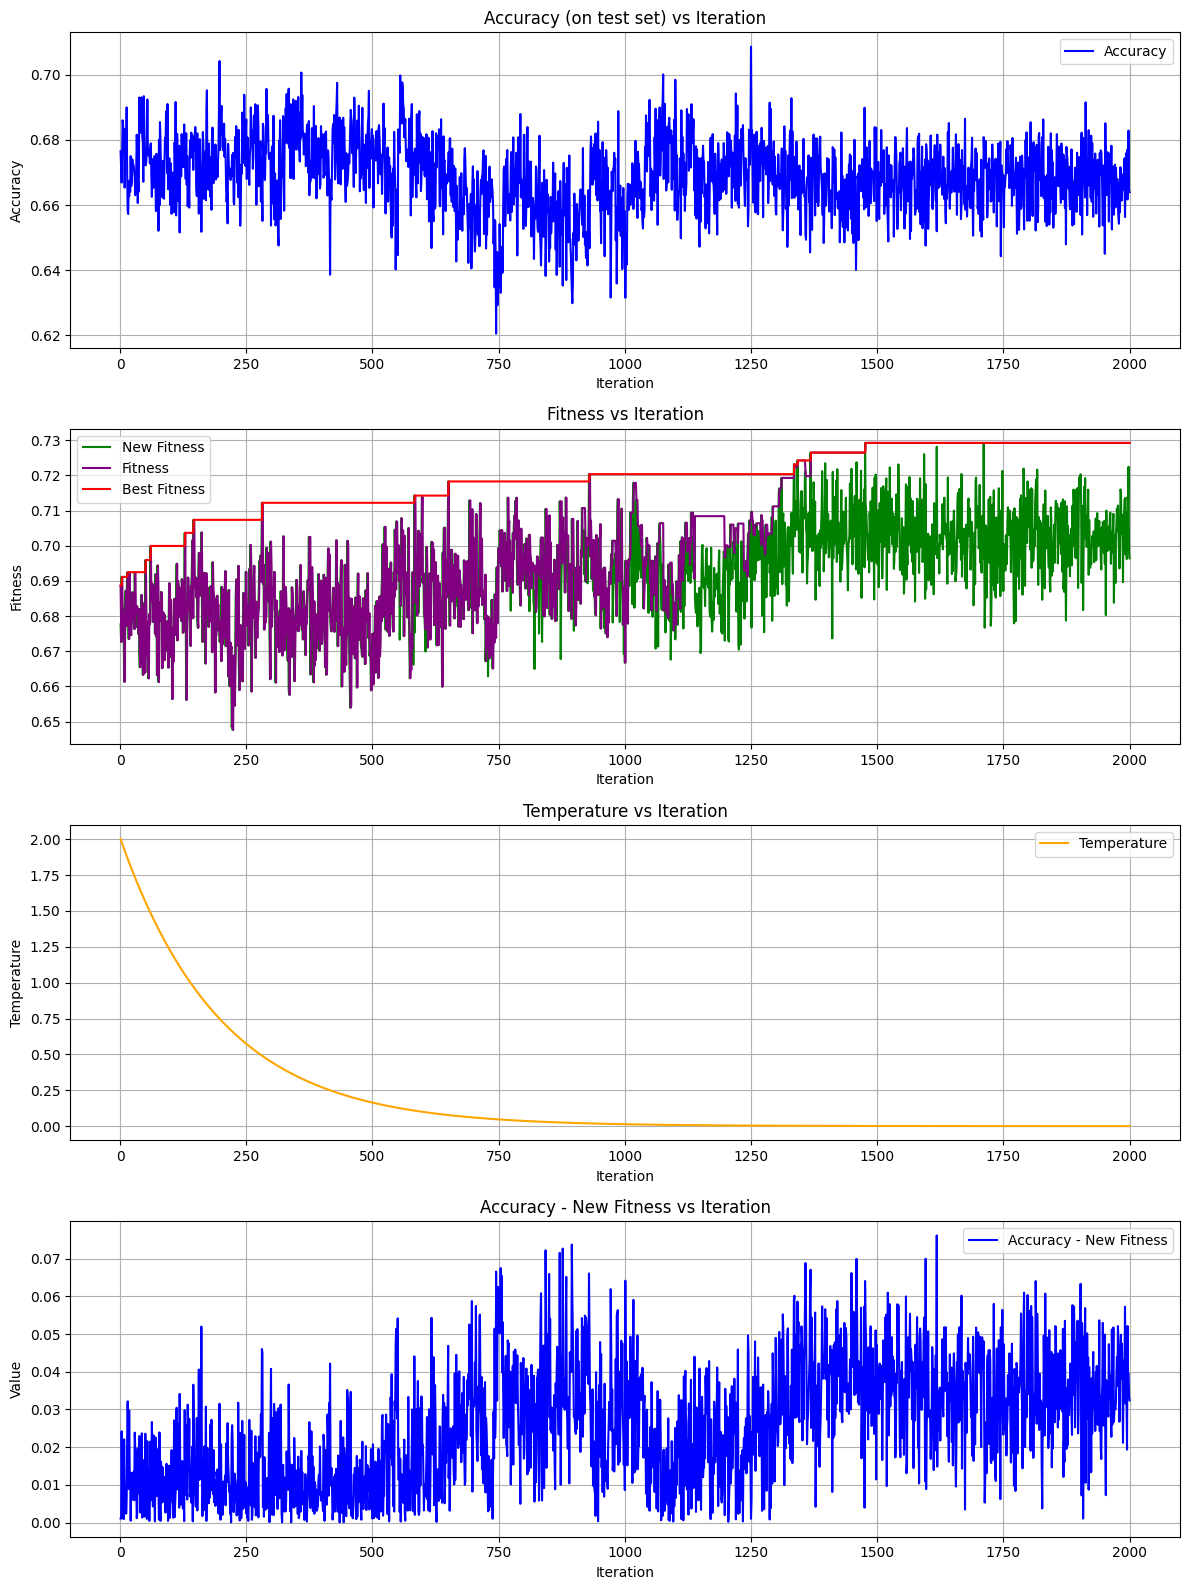

In [7]:
X = df['Iteration']

Y1 = df['Accuracy']

Y2 = df['NewFitness']
Y2_2 = df['BestFitness']
Y2_3 = df['Fitness']

Y3 = df['T']

fig, axs = plt.subplots(4, 1, figsize=(12, 16))
axs[0].plot(X, Y1, label="Accuracy", color="blue")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Accuracy (on test set) vs Iteration")
axs[0].grid()   
axs[0].legend()

axs[1].plot(X, Y2, label="New Fitness", color="green")
axs[1].plot(X, Y2_3, label="Fitness", color="purple")
axs[1].plot(X, Y2_2, label="Best Fitness", color="red")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Fitness")
axs[1].set_title("Fitness vs Iteration")
axs[1].grid()
axs[1].legend()


axs[2].plot(X, Y3, label="Temperature", color="orange")
axs[2].set_xlabel("Iteration")
axs[2].set_ylabel("Temperature")
axs[2].set_title("Temperature vs Iteration")
axs[2].grid()
axs[2].legend()

axs[3].plot(X, np.abs(Y1 - Y2), label="Accuracy - New Fitness", color="blue")
axs[3].set_xlabel("Iteration")
axs[3].set_ylabel("Value")
axs[3].set_title("Accuracy - New Fitness vs Iteration")
axs[3].grid()
axs[3].legend()

plt.tight_layout()
# plt.savefig('./../res/bagging_sa_detail_geometric.png')

plt.show()